In [1]:
import iris
import matplotlib.colors as mcol
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import numpy as np
from iris.experimental import stratify
from matplotlib.offsetbox import AnchoredText

In [2]:
from tqdm.notebook import tqdm

In [3]:
import aeolus
from aeolus.calc import spatial_mean, time_mean, zonal_mean
from aeolus.const import init_const
from aeolus.coord import get_cube_rel_days, get_xy_coords, roll_cube_pm180, regrid_3d, replace_z_coord
from aeolus.io import create_dummy_cube, load_vert_lev
from aeolus.model import um
from aeolus.plot import subplot_label_generator, tex2cf_units
from aeolus.subset import extract_last_n_days

In [16]:
import pandas as pd

In [4]:
from pouch.plot import (
    KW_AUX_TTL,
    KW_MAIN_TTL,
    KW_SBPLT_LABEL,
    KW_ZERO_LINE,
    KW_SYM0,
    figsave,
    linspace_pm1,
    use_style,
)

KW_SYM0 = {**KW_SYM0, "cmap": "seismic"}

In [5]:
%load_ext watermark

%watermark
%watermark -iv

Last updated: 2022-10-31T14:57:20.763387+00:00

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.5.0

Compiler    : GCC 10.4.0
OS          : Linux
Release     : 4.15.0-194-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 192
Architecture: 64bit

iris      : 3.3.0
aeolus    : 0.4.15
numpy     : 1.23.4
matplotlib: 3.6.1



In [6]:
import mypaths

In [13]:
def load_um_data(sim_label, subdir=""):
    fnames = sorted((mypaths.results_um / sim_label / subdir).glob("atmos*/*a.p*"))
    return iris.load(fnames)

In [14]:
SIM_CASES = {
    "tle": {"title": "TLE", "planet": "earth"},
}

MODELS = {
    "um": {"title": "UM", "get_files": load_um_data, "kw_plt": {"linestyle": "--"}},
    # "lfric": {"title": "LFRic", "get_files": load_lfric_data, "kw_plt": {"linestyle": "-"}},
}

In [55]:
df = pd.concat(
    map(
        lambda fpath: pd.read_csv(fpath, header=None, sep=r"\s+"),
        (mypaths.results_um / "el").glob("atmos_base_*/conservation_diag.dat"),
    )
)
df = df.rename({0: "timestep", 1: "rho", 2: "aam", 3: "ke"}, axis="columns").sort_values(by="timestep").set_index("timestep")

(200.0, 1200.0)

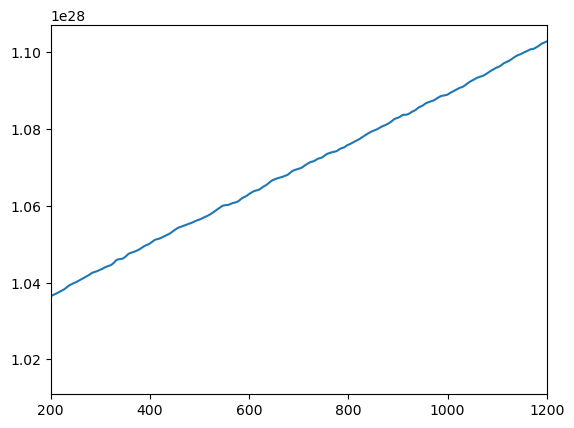

In [65]:
plt.plot(df.index/72, df.aam)
plt.xlim(200, 1200)

,0,1,2,3
0,0,1.653598e+28,2.781580e+25,0.000000e+00
1,72,5.133513e+18,2.781722e+25,1.719599e+18
2,144,5.133556e+18,2.783666e+25,1.243530e+19
3,216,5.132846e+18,2.746230e+25,4.532527e+19
4,288,5.132071e+18,2.682330e+25,1.293155e+20
...,...,...,...,...
45,86112,6.920056e+18,2.912075e+25,7.207619e+20
46,86184,6.921445e+18,2.872035e+25,7.209065e+20
47,86256,6.922876e+18,2.762599e+25,7.262703e+20
48,86328,6.924497e+18,2.663272e+25,7.484821e+20


In [29]:
pd.read_csv(sorted((mypaths.results_um / sim_label).glob("atmos_base_*/conservation_diag.dat"))[0], header=None, sep=r"\s+")

,0,1,2,3
0,0,1.653598e+28,2.781580e+25,0.000000e+00
1,72,5.133513e+18,2.781722e+25,1.719599e+18
2,144,5.133556e+18,2.783666e+25,1.243530e+19
3,216,5.132846e+18,2.746230e+25,4.532527e+19
4,288,5.132071e+18,2.682330e+25,1.293155e+20
5,360,5.131036e+18,2.583840e+25,2.135646e+20
6,432,5.130628e+18,2.436279e+25,2.729873e+20
7,504,5.130577e+18,2.348337e+25,3.140452e+20
8,576,5.130877e+18,2.199930e+25,3.343280e+20
9,648,5.131130e+18,2.063490e+25,3.352162e+20


In [15]:
runs = {}
for model_key, model_prop in tqdm(MODELS.items()):
    runs[model_key] = {}

    for sim_label, sim_prop in SIM_CASES.items():
        runs[model_key][sim_label] = model_prop["get_files"](sim_label, subdir="")

  0%|          | 0/1 [00:00<?, ?it/s]

/home/ds591/mambaforge/envs/lfric_ana/lib/python3.10/site-packages/iris/fileformats/rules.py:353: UserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(msg.format(factory=factory_name))


In [12]:
runs

{'um': {'tle': []}}

In [12]:
the_run = runs[model_key][sim_label]

In [13]:
# height_theta, height_rho = the_run.extract("height_above_reference_ellipsoid")
height_theta = np.linspace(0, 32000, 33)
height_rho = np.linspace(1000, 32000, 32) - 500

In [49]:
t_sfc = the_run.extract_cube(um.t_sfc)
p_sfc = the_run.extract_cube(um.p_sfc)

In [45]:
theta = the_run.extract_cube(um.thta)
exner = the_run.extract_cube(um.exner)
exner_thlev = replace_z_coord(regrid_3d(exner, theta))
theta = replace_z_coord(theta)
temp = theta * exner_thlev

/home/ds591/mambaforge/envs/lfric_ana/lib/python3.8/site-packages/iris/coords.py:2223: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/home/ds591/mambaforge/envs/lfric_ana/lib/python3.8/site-packages/iris/coords.py:2223: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_period'.
  warnings.warn(msg.format(self.name()))


<AxesSubplot: >

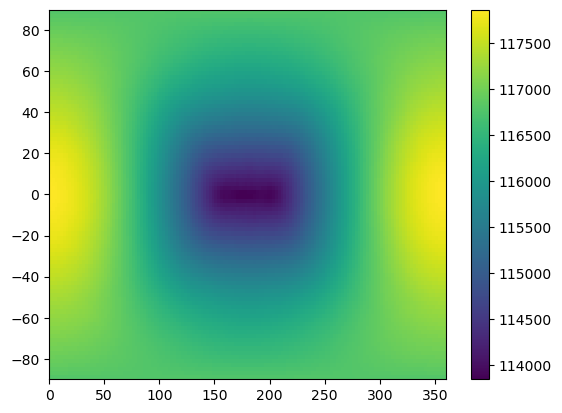

In [54]:
qplt_map(time_mean(p_sfc))

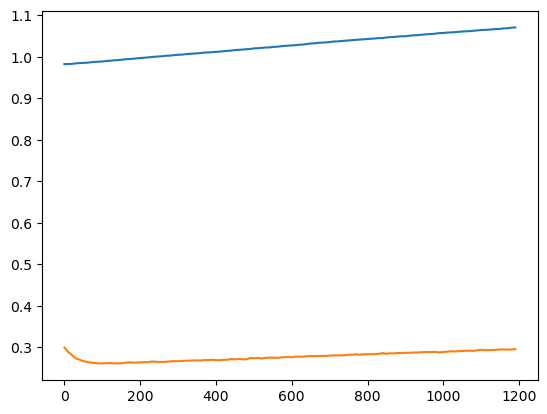

In [65]:
ax = plt.axes()
qplt_timeseries_1d(exner[:, 0, 0, 0], ax=ax)
qplt_timeseries_1d(exner[:, -1, 0, 0], ax=ax)

In [53]:
def qplt_map(cube, ax=None, model=um, **kw_plt):
    newax = False
    if ax is None:
        ax = plt.axes()
        newax = True
    fig = ax.figure
    lons = cube.coord(um.x).points
    lats = cube.coord(um.y).points
    mappable = ax.pcolormesh(lons, lats, cube.data, **kw_plt)
    fig.colorbar(mappable, ax=ax)
    if newax:
        return ax

In [51]:
def qplt_timeseries_1d(cube, ax=None, model=um, **kw_plt):
    newax = False
    if ax is None:
        ax = plt.axes()
        newax = True
    fig = ax.figure
    days = get_cube_rel_days(cube, model=um)
    ln = ax.plot(days, cube.data, **kw_plt)
    if newax:
        return ax

In [52]:
def qplt_timeseries_2d(cube, ax=None, model=um, **kw_plt):
    newax = False
    if ax is None:
        ax = plt.axes()
        newax = True
    fig = ax.figure
    days = get_cube_rel_days(cube, model=um)
    z = cube.coord(um.z).points
    mappable = ax.pcolormesh(days, z, cube.data.T, **kw_plt)
    fig.colorbar(mappable, ax=ax)
    if newax:
        return ax

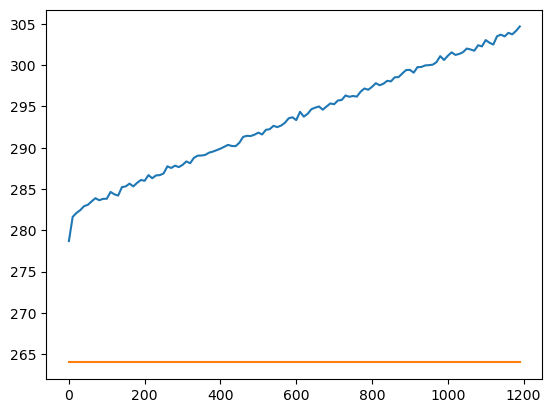

In [46]:
fig, ax = plt.subplots()
qplt_timeseries_1d(spatial_mean(temp[:, 0, ...]), ax=ax)
qplt_timeseries_1d(spatial_mean(t_sfc[...]), ax=ax)

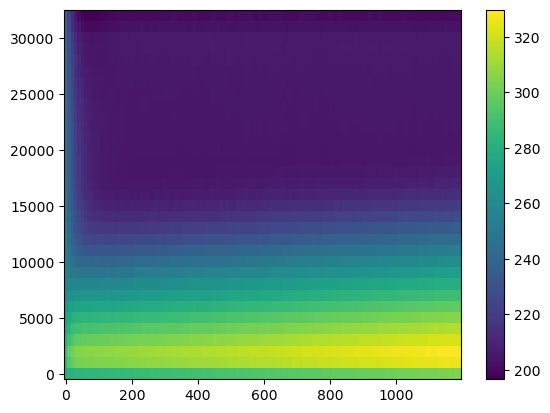

In [47]:
qplt_timeseries_2d(spatial_mean(temp))

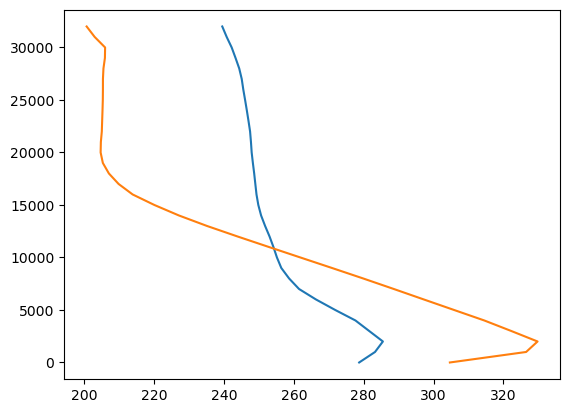

In [48]:
fig, ax = plt.subplots()
ax.plot(spatial_mean(temp[0, ...]).data, height_theta)
ax.plot(spatial_mean(temp[-1, ...]).data, height_theta)

In [19]:
lons = theta.coord(um.x).points
lats = theta.coord(um.y).points

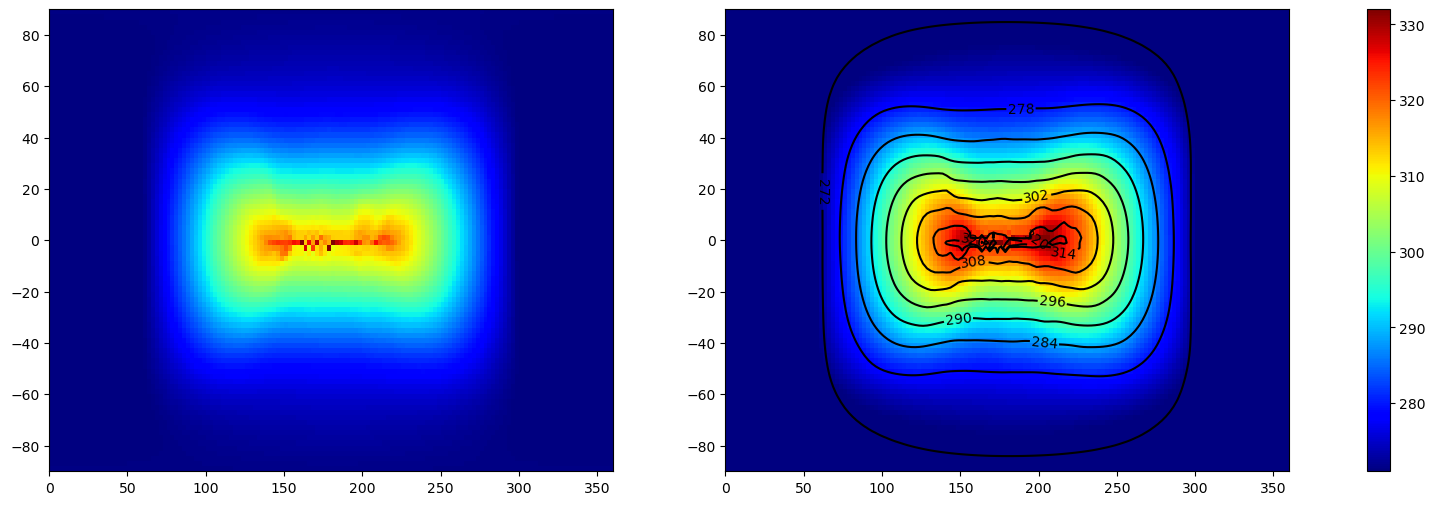

In [24]:
fig, axs = plt.subplots(figsize=(20, 6), ncols=2)
pcol0 = axs[0].pcolormesh(lons, lats, theta[0, 0, ...].data, vmin=271, vmax=332, cmap=plt.cm.jet)
pcol1 = axs[1].pcolormesh(lons, lats, theta[-1, 0, ...].data, vmin=271, vmax=332, cmap=plt.cm.jet)
cntr = axs[1].contour(lons, lats, theta[0, 0, ...].data, colors="k", levels=np.arange(272, 321, 6))
axs[1].clabel(cntr, fmt="%.0f")

fig.colorbar(pcol0, ax=axs)

/home/ds591/mambaforge/envs/lfric_ana/lib/python3.8/site-packages/iris/coords.py:2223: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/home/ds591/mambaforge/envs/lfric_ana/lib/python3.8/site-packages/iris/coords.py:2223: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_period'.
  warnings.warn(msg.format(self.name()))


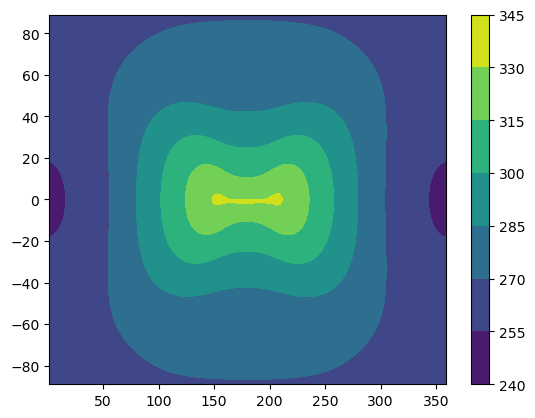

In [65]:
plt.contourf(lons, lats, time_mean(theta[:, 0, ...]).data)
plt.colorbar()